In [1]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

/home/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import math
import numpy as np
    
def get_polygon_angles(n_sides):
    interior_angle = (180 * (n_sides - 2)) / float(n_sides)
    exterior_angle = 180 - interior_angle
    
    initial_angle = 90
    angles = [(x * exterior_angle + initial_angle) % 360 for x in range(n_sides+1)]
    
    return angles

def get_polygon_points(angles, radius):
    points = [get_polygon_point(angle, radius) for angle in angles]
    return points

def get_polygon_point(angle, radius):
    x = radius * math.cos(angle * (math.pi/180))
    y = radius * math.sin(angle * (math.pi/180))
    return (x, y)

def get_data_points(angles, values, radius):
    value_radii = [value * radius for value in values]
    value_points = [get_polygon_point(angle, value) for (angle, value) in zip(angles, value_radii)]
#     value_points.append(value_points[0]) # make a loop
    return value_points
    
def spider_plot(features, values):
    fig, ax = plt.subplots(111)
    
    angles = get_polygon_angles(len(features))
    radius = 100
    
    # plot nested polygons
    for inner_radius in np.linspace(0, radius, 4):
        points = get_polygon_points(angles, inner_radius)
        x, y = zip(*points)
        plt.plot(x, y, color='black')
        
    # plot data values
    value_points = get_data_points(angles, values, radius)
    points = np.asarray(value_points)
    print points
#     x, y = zip(*value_points

In [44]:
import math
import numpy as np
    
def get_polygon_angles(n_sides):
    interior_angle = (180 * (n_sides - 2)) / float(n_sides)
    exterior_angle = 180 - interior_angle
    
    initial_angle = 90
    angles = [(x * exterior_angle + initial_angle) % 360 for x in range(n_sides+1)]
    
    return angles

def get_polygon_points(angles, radius):
    points = [get_polygon_point(angle, radius) for angle in angles]
    return points

def get_polygon_point(angle, radius):
    x = radius * math.cos(angle * (math.pi/180))
    y = radius * math.sin(angle * (math.pi/180))
    return (x, y)

def get_data_points(angles, values, radius):
    # scale values
    max_val = float(max(values))
    values = [value / max_val for value in values]
    
    value_radii = [value * radius for value in values]
    value_points = [get_polygon_point(angle, value) for (angle, value) in zip(angles, value_radii)]

    return value_points
    
def spider_plot(features, values):    
    angles = get_polygon_angles(len(features))
    radius = 100
    
    # plot nested polygons
    for inner_radius in np.linspace(0, radius, 4):
        points = get_polygon_points(angles, inner_radius)
        x, y = zip(*points)
        plt.plot(x, y, color='black')
        
    # draw dotted lines
    outer_points = get_polygon_points(angles, radius)
    for (x, y) in outer_points:
        plt.plot([0, x], [0, y], color='black', ls='--')
    points = np.asarray(outer_points)
    pgon = Polygon(points, color='black', closed=True, alpha=0.1)
    plt.gca().add_patch(pgon)
    
    # label max value
    max_val = max(values)
    x, y = outer_points[0]
    plt.text(x+(0.1*y), y, str(max_val))
        
    # plot data values
    value_points = get_data_points(angles, values, radius)
    points = np.asarray(value_points)
    pgon = Polygon(points, closed=True, alpha=0.5)
    plt.gca().add_patch(pgon)
    
    # label features
    label_points = get_polygon_points(angles, radius * 1.2)
    for (point, feature) in zip(label_points, features):
        x, y = point
        plt.text(x, y, feature, fontsize=14, ha='center', va='center')

    x, y = zip(*outer_points)
    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)
    plt.xlim((xmin-20,xmax+20))
    plt.ylim((ymin-20,ymax+50))
        
    # remove unnecessary plot things
    plt.axis('equal')
    plt.axis('off')
    plt.grid(False)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

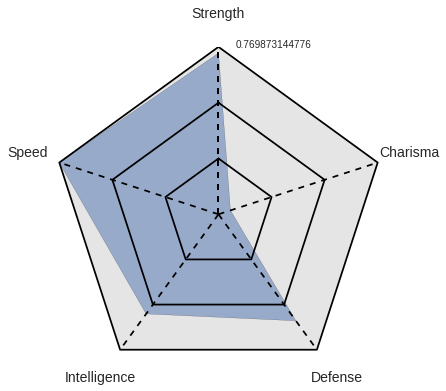

In [45]:
import random

features = ['Strength', 'Speed', 'Intelligence', 'Defense', 'Charisma']
values = [random.random() for _ in features]

plt.figure(figsize=(6, 6))
spider_plot(features, values)

In [46]:
import pandas as pd
students = pd.read_csv('../data/student0216.csv')

def spider_student_major(student_id):
    student = students[students.studentid == student_id].iloc[0]
    
    features = ['ME', 'ECE', 'DESIGN', 'CS', 'BIO']
    values = [student.me, student.ece, student.design, student.cs, student.bio]
    
    spider_plot(features, values)

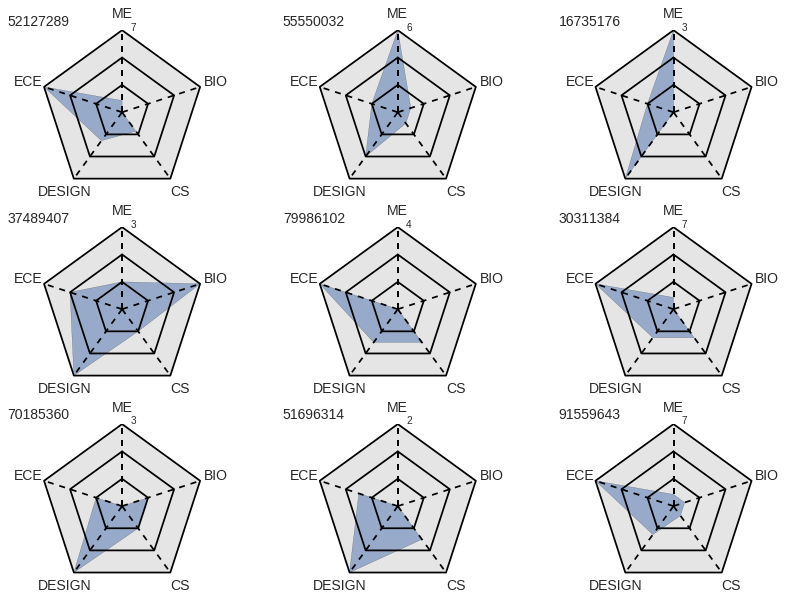

In [47]:
student_ids = students.sample(9).studentid

plt.figure(figsize=(14, 10))
for (index, student_id) in enumerate(student_ids):
    plt.subplot(3, 3, index+1)
    spider_student_major(student_id)